# 3 - Feature Selection

In this module, we will understand which features are important in our Credit Card dataset using - 


In [5]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [6]:
os.chdir(r'D:\OneDrive - Northeastern University\Jupyter Notebook\Data Science Projects\Bank-Customer-Profiling-and-Segmentation')
data = pd.read_csv('./data/marketing_data_clean_w_features.csv')
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_USAGE_RATIO,ONEOFF_PURCHASE_RATIO,INSTALLMENT_PURCHASE_RATIO,TOTAL_PURCHASES,PURCHASES_PER_TRX,CASH_ADVANCE_PER_TRX,PAYMENT_RATIO,MINIMUM_PAYMENT_RATIO,FULL_PAYMENT_FLAG,UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.040901,0.0,1.0,95.40,47.700000,0.000000,0.201802,0.139510,0,0.095400
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.457495,0.0,0.0,0.00,0.000000,1610.736371,0.586148,0.153191,0,0.920421
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.332687,1.0,0.0,773.17,64.430833,0.000000,0.082942,0.083638,0,0.103089
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0.222223,1.0,0.0,1499.00,1499.000000,205.788017,0.000000,0.115228,0,0.227305
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.681429,1.0,0.0,16.00,16.000000,0.000000,0.565279,0.203993,0,0.013333


In [3]:
# Min Max Scaler
names = data.columns
indexes = data.index
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(data)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,BALANCE_USAGE_RATIO,ONEOFF_PURCHASE_RATIO,INSTALLMENT_PURCHASE_RATIO,TOTAL_PURCHASES,PURCHASES_PER_TRX,CASH_ADVANCE_PER_TRX,PAYMENT_RATIO,MINIMUM_PAYMENT_RATIO,FULL_PAYMENT_FLAG,UTILIZATION_RATIO
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.002571,0.000000,1.493652e-08,0.001945,0.007974,0.000000,0.001333,0.005613,0.0,0.000840
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.028755,0.000000,0.000000e+00,0.000000,0.000000,0.108566,0.003871,0.006164,0.0,0.008107
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.020911,0.554418,0.000000e+00,0.015766,0.010771,0.000000,0.000548,0.003365,0.0,0.000908
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,...,0.013968,0.554418,0.000000e+00,0.030567,0.250599,0.013870,0.000000,0.004636,0.0,0.002002
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.042830,0.554418,0.000000e+00,0.000326,0.002675,0.000000,0.003734,0.008208,0.0,0.000117


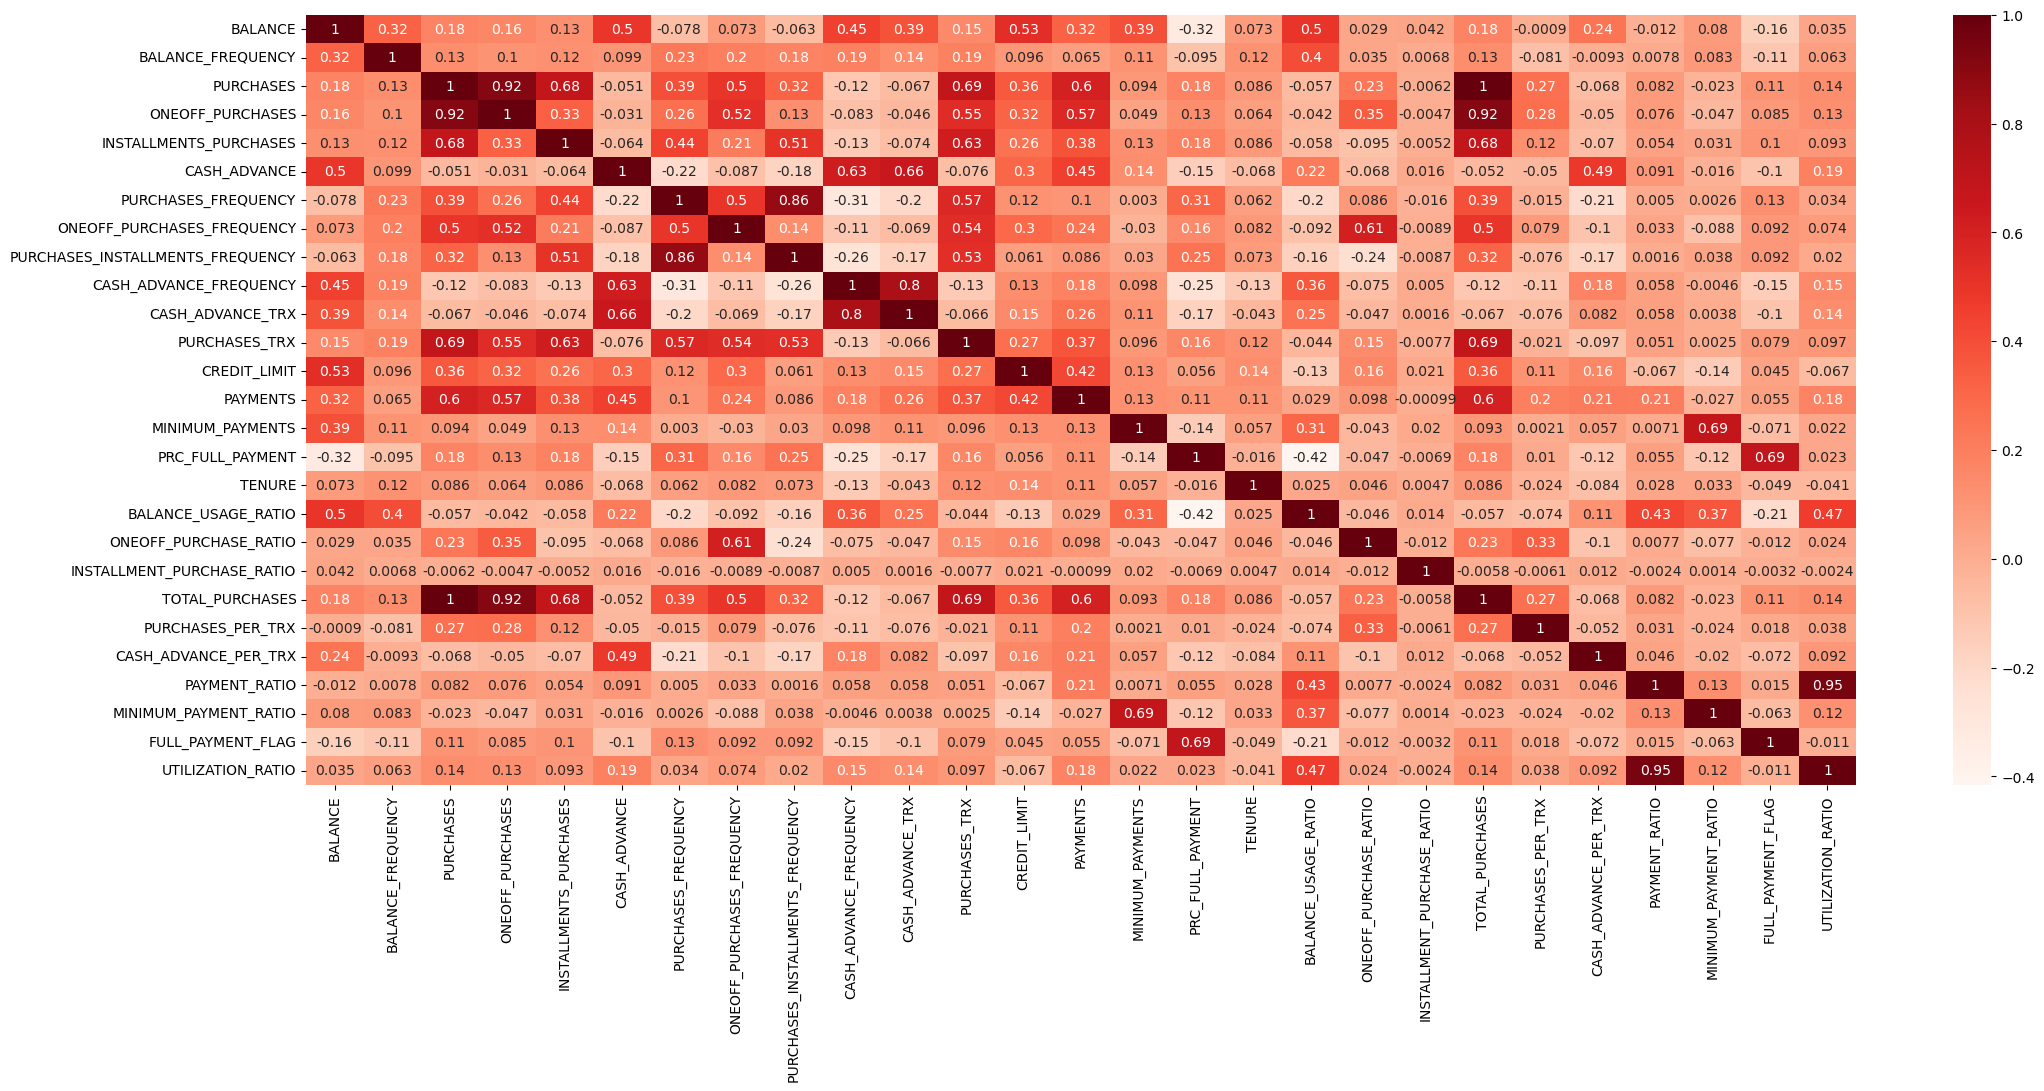

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
# Correlation with BALANCE variable
cor_target = abs(cor["BALANCE"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.01]
relevant_features

BALANCE                             1.000000
BALANCE_FREQUENCY                   0.322412
PURCHASES                           0.181261
ONEOFF_PURCHASES                    0.164350
INSTALLMENTS_PURCHASES              0.126469
CASH_ADVANCE                        0.496692
PURCHASES_FREQUENCY                 0.077944
ONEOFF_PURCHASES_FREQUENCY          0.073166
PURCHASES_INSTALLMENTS_FREQUENCY    0.063186
CASH_ADVANCE_FREQUENCY              0.449218
CASH_ADVANCE_TRX                    0.385152
PURCHASES_TRX                       0.154338
CREDIT_LIMIT                        0.531267
PAYMENTS                            0.322802
MINIMUM_PAYMENTS                    0.394282
PRC_FULL_PAYMENT                    0.318959
TENURE                              0.072692
BALANCE_USAGE_RATIO                 0.503557
ONEOFF_PURCHASE_RATIO               0.029097
INSTALLMENT_PURCHASE_RATIO          0.041544
TOTAL_PURCHASES                     0.181198
CASH_ADVANCE_PER_TRX                0.243340
PAYMENT_RA

### 1. Feature Importance using `Random forest regressor`

In [9]:
# Model Random Forest Regression
X = data_scaled.drop(["BALANCE", "BALANCE_USAGE_RATIO"],axis = 1)
y = data_scaled["BALANCE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
## Training and testing model with default features
def randomforestrgressor_default(params, X_train, y_train, X_test, y_test):
    
    # rf_model with default features
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    
    # Training
    y_pred = rf_model.predict(X_train)
    print("mse_rf_model_train = ", np.sqrt(mean_squared_error(y_train, y_pred)))
    
    # Testing
    y_pred_test = rf_model.predict(X_test)
    print("mse_rf_model_test = ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
randomforestrgressor_default(X_train, y_train, X_test, y_test)

mse_rf_model_train =  0.010570307690859546
mse_rf_model_test =  0.025932424587848082


#### Model Tuning using `GRID_Search_CV`

In [14]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 15],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 8]}

rf_model = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': None,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
## Training and testing model with GridSearchCV features
def randomforestrgressor_w_params(X_train, y_train, X_test, y_test):
    
    # rf_model with GridSearchCV features
    rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_)
    rf_tuned.fit(X_train, y_train)
    
    # Training
    y_pred = rf_tuned.predict(X_train)
    print("mse_rf_model_train_w_params = ", np.sqrt(mean_squared_error(y_train, y_pred)))
    
    # Testing
    y_pred_test = rf_tuned.predict(X_test)
    print("mse_rf_model_test_w_params = ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    return rf_tuned

In [24]:
rf_tuned_model = randomforestrgressor_w_params(X_train, y_train, X_test, y_test)

mse_rf_model_train_w_params =  0.010261659289763955
mse_rf_model_test_w_params =  0.02514938983229998


#### Random Forest Feature Importances

In [65]:
feature_imp = pd.DataFrame({'Value': rf_tuned_model.feature_importances_, 'Feature': X.columns})
feature_imp.sort_values(by="Value", ascending=False).reset_index(drop=True)

,Value,Feature
0,0.555386,MINIMUM_PAYMENTS
1,0.220093,CREDIT_LIMIT
2,0.058387,CASH_ADVANCE
3,0.050208,MINIMUM_PAYMENT_RATIO
4,0.020636,PAYMENTS
5,0.020185,BALANCE_FREQUENCY
6,0.012232,PRC_FULL_PAYMENT
7,0.009325,CASH_ADVANCE_TRX
8,0.008528,PAYMENT_RATIO
9,0.008060,UTILIZATION_RATIO


In [58]:
def rf_model_plot_feat_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    barplot.get_figure().savefig('Images/RFE_importances.png')
    
    return feature_imp

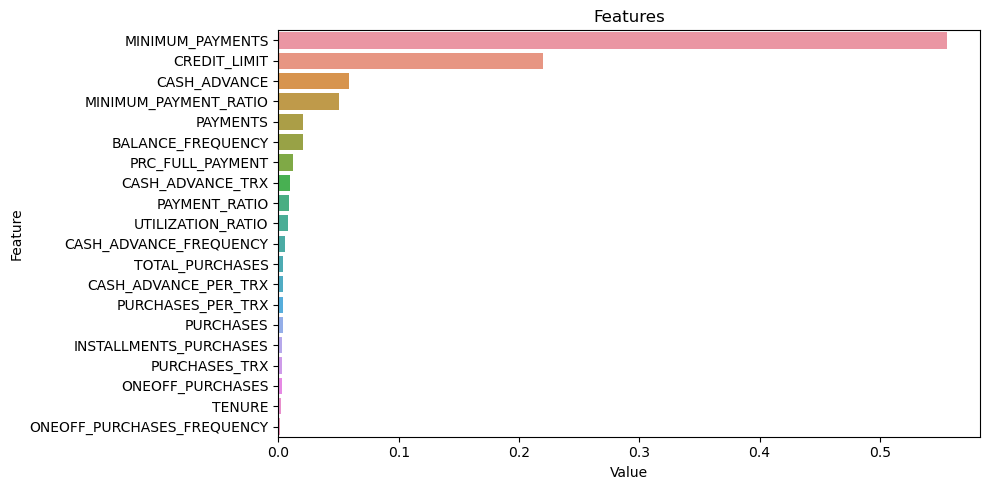

In [59]:
rf_feature_imp = rf_model_plot_feat_importance(rf_tuned_model, X, 20)

### 2. Feature Importance using `Lasso CV`

In [66]:
X = data_scaled.drop(["BALANCE", "BALANCE_USAGE_RATIO"], axis= 1)
y = data_scaled["BALANCE"]

In [67]:
def lassoCV(X, y):
    reg = LassoCV()
    reg.fit(X, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y))
    coef = pd.Series(reg.coef_, index = X.columns)
    
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    
    ## Plot feature importance
    imp_coef = coef.sort_values()
    lasso_FE = imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    lasso_FE.get_figure().savefig('Images/Lasso_Feature_Imp.png')
    plt.show()    
    
    return coef

Best alpha using built-in LassoCV: 0.000010
Best score using built-in LassoCV: 0.640102
Lasso picked 22 variables and eliminated the other 3 variables


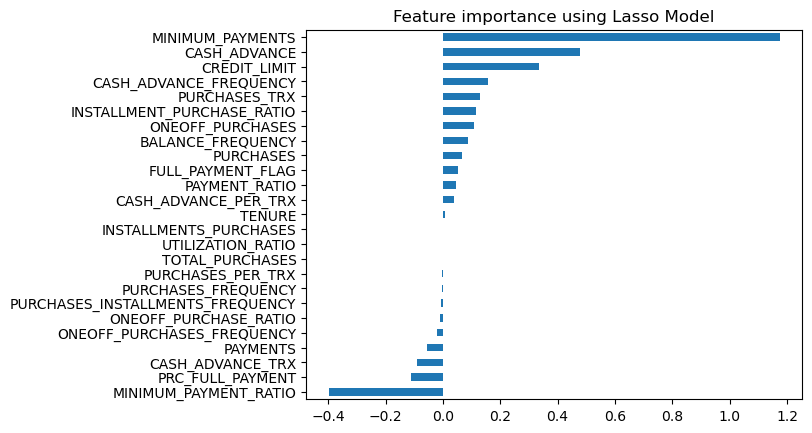

In [68]:
coef = lassoCV(X, y)

In [69]:
coef.sort_values(ascending=False)

MINIMUM_PAYMENTS                    1.173629
CASH_ADVANCE                        0.476381
CREDIT_LIMIT                        0.335068
CASH_ADVANCE_FREQUENCY              0.156407
PURCHASES_TRX                       0.129300
INSTALLMENT_PURCHASE_RATIO          0.115043
ONEOFF_PURCHASES                    0.109612
BALANCE_FREQUENCY                   0.087327
PURCHASES                           0.064872
FULL_PAYMENT_FLAG                   0.053254
PAYMENT_RATIO                       0.045682
CASH_ADVANCE_PER_TRX                0.038782
TENURE                              0.008709
TOTAL_PURCHASES                     0.000000
UTILIZATION_RATIO                  -0.000000
INSTALLMENTS_PURCHASES              0.000000
PURCHASES_PER_TRX                  -0.002264
PURCHASES_FREQUENCY                -0.003098
PURCHASES_INSTALLMENTS_FREQUENCY   -0.006077
ONEOFF_PURCHASE_RATIO              -0.009208
ONEOFF_PURCHASES_FREQUENCY         -0.020371
PAYMENTS                           -0.056383
CASH_ADVAN